<h1> <u>Machine Learning Bootcamp - Assignment </u></h1>
    <br>
    a)	Exploratory Data Analysis<br>
    b)	Customer Segmentation<br>
    c)	Users profiling based on EDA and Customer Segmentation<br>
    d)	Item recommendation for each users<br>
    e)	Churn Prediction<br><br>


In [79]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("D:\\ml\\data.csv",encoding="ISO-8859-1")

In [81]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [82]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [361]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# EDA: Univariate & Bivariate Analysis

In [342]:
data.Description.nunique() ### Number of unique products

4042

In [366]:
purchase_date = []
for i in range(0,len(data)):
    date = data.iloc[i].InvoiceDate
    date = date.split(" ")[0]
    purchase_date.append(date)


In [84]:
data['InvoiceNo'].nunique()  ### Unique Purchases

25900

In [85]:
data['Country'].nunique() ### Unique Countries

38

In [86]:
data['CustomerID'].nunique() ### Unique Customers

4372

#### Null Values

In [87]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

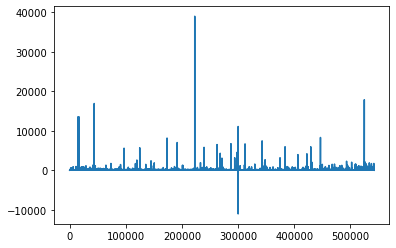

In [88]:
plt.plot(data['UnitPrice'])

In [89]:
# Invalid Data Percentage
len(data[data.UnitPrice <= 0])/len(data) * 100 

0.46446912673530055

### Country Wise Consumers Population

In [334]:
country_wise = dict()
li = data.Country.unique()
for x in li:
    country_wise[x]=0
for i in range(0,len(data)):
    country = data.iloc[i].Country
    country_wise[country]= country_wise[country]+1

In [338]:
list_countries = []
for k,v in country_wise.items():
    list_countries.append([k,v])
list_countries.sort(key = lambda x:x[1], reverse = True)
# country_wise.plot.hexbin(x='Attack', y='Defense', gridsize=15)

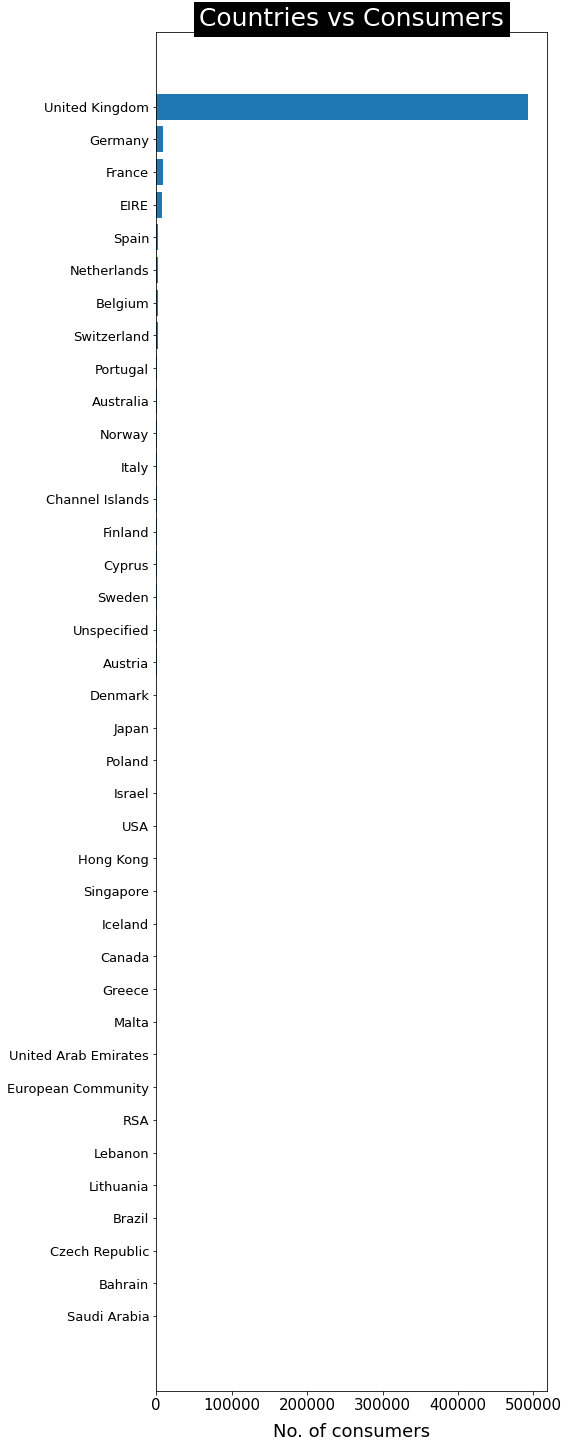

In [341]:
liste = sorted(list_countries, key = lambda x:x[1], reverse = True)
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of consumers", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Countries vs Consumers",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

### Most Bought Product

In [348]:
product_wise = dict()
li = data.Description.unique()
for x in li:
    product_wise[x]=0
for i in range(0,len(data)):
    product = data.iloc[i].Description
    quantity = data.iloc[i].Quantity
    product_wise[product]= product_wise[product]+quantity

In [349]:
list_products = []
for k,v in product_wise.items():
    list_products.append([k,v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [352]:
## Selecting top 20 most bought Products
list_2 = list_products[:20]

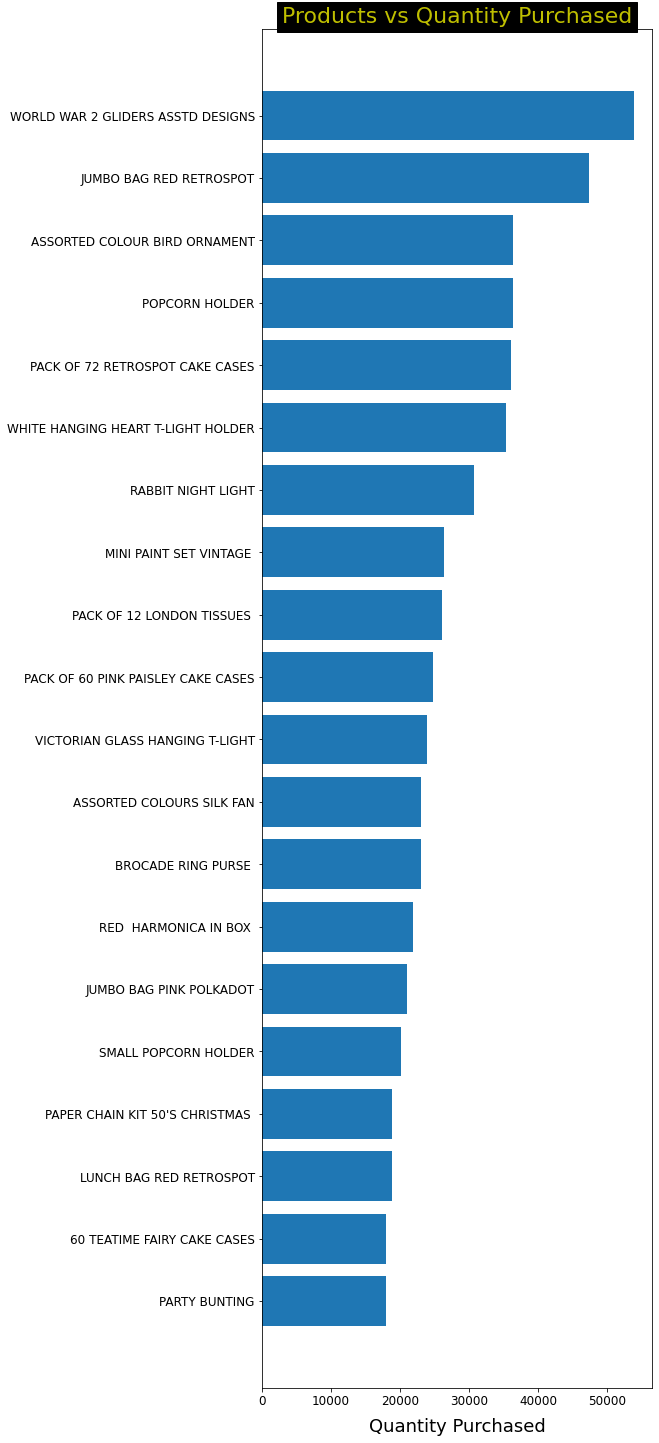

In [360]:
liste = sorted(list_2, key = lambda x:x[1], reverse = True)
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yticks(x_axis, x_label)
plt.xlabel("Quantity Purchased", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Products vs Quantity Purchased",bbox={'facecolor':'k', 'pad':5}, color='y',fontsize = 22)
plt.show()

#### Removing Invalid Data

In [90]:
data = data[data.UnitPrice >0] 

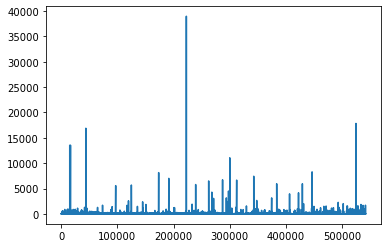

In [91]:
plt.plot(data['UnitPrice'])

In [92]:
cancelled_orders = [x for x in data['InvoiceNo'] if "C" in x] 

In [93]:
cancelled_orders = pd.Series(cancelled_orders)

In [94]:
cancelled_orders.nunique() #Cancelled Orders

3836

In [95]:
3836/25900*100

14.810810810810812

In [96]:
li = data[data.InvoiceNo == "537626"][['UnitPrice','Quantity']]
sum = 0
for x in range(0,len(li)):
    sum=sum+(li.iloc[x].UnitPrice * li.iloc[x].Quantity )
sum

711.79

## Customer Segmentation & Users profiling 

#### Cleaning data from cancelled orders

In [97]:
data_clean = data.copy(deep = True)
data_clean['Quantity_Cancelled'] = 0

to_remove =[]

for index,col in data.iterrows():
    if(col['Quantity']<=0 and col['Description'] != 'Discount'):
        temp = data[(data['CustomerID'] == col['CustomerID']) 
                    & (data['StockCode'] == col['StockCode' ])
                    & (data['InvoiceDate'] < col['InvoiceDate'])
                    & (data['Quantity']>0)].copy()
        
        if(temp.shape[0] == 0):
            to_remove.append(index)
        elif(temp.shape[0] == 1):
            index2 = temp.index[0]
            data_clean.loc[index2,'Quantity_Cancelled'] = -col['Quantity']
            to_remove.append(index)
        else:
            temp.sort_index(axis = 0,ascending=False,inplace=True)
            for index2,col2 in temp.iterrows():
                if(col2['Quantity'] >= -col['Quantity']):
                    data_clean.loc[index2,'Quantity_Cancelled'] = -col['Quantity']
                    to_remove.append(index)
                    break


In [98]:
len(to_remove)/len(data)*100


1.6995061105837685

In [99]:
data_clean.drop(to_remove,axis = 0,inplace= True)

In [123]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Cancelled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34


### Finding Total Price

In [101]:
data_clean['TotalPrice'] = data_clean['UnitPrice']*(data_clean['Quantity']-data_clean['Quantity_Cancelled'])

In [132]:
temp = data_clean.groupby(by=['CustomerID','InvoiceDate','InvoiceNo'],as_index=False)['TotalPrice'].sum()

In [133]:
## Total bill of a particular order
data_overall = temp.rename(columns = {
    'TotalPrice':'Overall_Price'
})

In [134]:
data_overall.head()



,CustomerID,InvoiceDate,InvoiceNo,Overall_Price
0,12346.0,1/18/2011 10:01,541431,0.00
1,12347.0,1/26/2011 14:30,542237,475.39
2,12347.0,10/31/2011 12:25,573511,1294.32
3,12347.0,12/7/2010 14:57,537626,711.79
4,12347.0,12/7/2011 15:52,581180,224.82


##### Adding Date to dataframe "data_overall"

In [140]:
data_overall['Invoice_Date'] = pd.to_datetime(data_overall['InvoiceDate'])

In [145]:
data_overall = data_overall.drop(['InvoiceDate'],axis=1)

In [149]:
## Selected those values whose overall_price is greater than 0
data_overall = data_overall[data_overall['Overall_Price'] > 0]

In [148]:
data_overall.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Overall_Price,Invoice_Date
1,12347.0,542237,475.39,2011-01-26 14:30:00
2,12347.0,573511,1294.32,2011-10-31 12:25:00
3,12347.0,537626,711.79,2010-12-07 14:57:00
4,12347.0,581180,224.82,2011-12-07 15:52:00
5,12347.0,549222,636.25,2011-04-07 10:43:00
6,12347.0,556201,382.52,2011-06-09 13:01:00


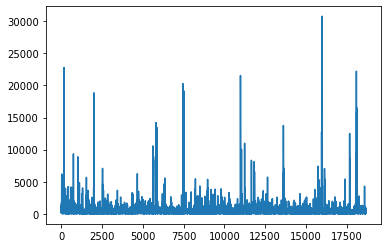

In [150]:
plt.plot(data_overall['Overall_Price'])

In [152]:
products = pd.DataFrame(data['Description'].unique()).rename(columns={
    0:'Description'
})

In [153]:
products.head()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


##### Function that selects important keywords with their frequency from the Description column

In [187]:
import nltk
from nltk import word_tokenize

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [188]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(products)

Nb of keywords in variable 'Description': 1531


In [194]:
keywords_frequency = count_keywords

In [196]:
li = []
for key,value in keywords_frequency.items():
    li.append([keywords_select[key],value])
li.sort(key = lambda x:x[1], reverse = True)

#### Selecting those words which has frequency more than 20 

In [370]:
li = []
for k,v in count_keywords.items():
    word = k
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 20: continue
    if ('+' in word) or ('/' in word): continue
    li.append([word, v])

In [371]:
li.sort(key = lambda x:x[1], reverse = True)

In [524]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Cancelled,TotalPrice,Category_Product,category_0,category_1,category_2,category_3,category_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30,4,0.00,0.00,0.0,0.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,0,20.34,0.00,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00,1,0.00,22.00,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,0,20.34,0.00,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,1,0.00,20.34,0.0,0.0,0.0


In [372]:
products_list = data_clean['Description'].unique()
X = pd.DataFrame()
for key, frequency in li:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), products_list))

In [410]:
data_clean.shape

(530225, 16)

In [218]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.16291384679161328
For n_clusters = 4 The average silhouette_score is : 0.1208286763090924
For n_clusters = 5 The average silhouette_score is : 0.12562624308082546
For n_clusters = 6 The average silhouette_score is : 0.14000794990493562
For n_clusters = 7 The average silhouette_score is : 0.12945159258214828
For n_clusters = 8 The average silhouette_score is : 0.13239964021883094
For n_clusters = 9 The average silhouette_score is : 0.12145759910321234


In [225]:
number_of_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = number_of_clusters, n_init=30)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", number_of_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.12228724834337942
For n_clusters = 5 The average silhouette_score is : 0.11898250288746934
For n_clusters = 5 The average silhouette_score is : 0.1223805509655869
For n_clusters = 5 The average silhouette_score is : 0.1197731650242726
For n_clusters = 5 The average silhouette_score is : 0.126237381848821
For n_clusters = 5 The average silhouette_score is : 0.11150042582453917
For n_clusters = 5 The average silhouette_score is : 0.12325414210196885
For n_clusters = 5 The average silhouette_score is : 0.12212978920878242
For n_clusters = 5 The average silhouette_score is : 0.10159686455424877
For n_clusters = 5 The average silhouette_score is : 0.17046397434183105


#### Clusters containing different products

In [226]:
pd.Series(clusters).value_counts()

0    3159
1     421
2     195
3     139
4     113
dtype: int64

In [227]:
#### Marking the products to their respective clusers
corresp = dict()
for key, val in zip (products_list, clusters):
    corresp[key] = val 

data_clean['Category_Product'] = data_clean.loc[:, 'Description'].map(corresp)

In [231]:
#### Calculating amount Spent on each category
for i in range(5):
    col = 'category_'+str(i)      
    data_temp = data_clean[data_clean['Category_Product'] == i]
    price_temp = data_temp['UnitPrice'] * (data_temp['Quantity'] - data_temp['Quantity_Cancelled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    data_clean.loc[:, col] = price_temp
    data_clean[col].fillna(0, inplace = True)

In [234]:
data_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Cancelled,TotalPrice,Category_Product,category_0,category_1,category_2,category_3,category_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,15.30,4,0.00,0.00,0.0,0.0,15.3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,0,20.34,0.00,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,22.00,1,0.00,22.00,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,0,20.34,0.00,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,20.34,1,0.00,20.34,0.0,0.0,0.0


In [245]:
temp = data_clean.groupby(by=['CustomerID', 'InvoiceNo','InvoiceDate'], as_index=False)['TotalPrice'].sum()
overall_price = temp.rename(columns = {'TotalPrice':'Overall Price'})

In [246]:
for i in range(5):
    col = 'category_'+str(i) 
    temp = data_clean.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    overall_price.loc[:, col] = temp 

In [248]:
overall_price['Invoice_Date'] = pd.to_datetime(overall_price['InvoiceDate'])

In [250]:
overall_price = overall_price.drop(['InvoiceDate'],axis=1)

In [253]:
overall_price = overall_price[overall_price['Overall Price'] > 0]
overall_price.sort_values('CustomerID', ascending = True)[:5]
overall_price.head()

,CustomerID,InvoiceNo,Overall Price,category_0,category_1,category_2,category_3,category_4,Invoice_Date
1,12347.0,537626,711.79,587.89,19.80,17.4,22.5,64.2,2010-12-07 14:57:00
2,12347.0,542237,475.39,386.45,28.44,0.0,47.9,12.6,2011-01-26 14:30:00
3,12347.0,549222,636.25,570.85,30.00,0.0,35.4,0.0,2011-04-07 10:43:00
4,12347.0,556201,382.52,362.12,20.40,0.0,0.0,0.0,2011-06-09 13:01:00
5,12347.0,562032,584.91,531.81,39.60,13.5,0.0,0.0,2011-08-02 08:48:00


In [254]:
print(overall_price['Invoice_Date'].min(), '->',  overall_price['Invoice_Date'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [258]:
transactions_per_user=overall_price.groupby(by=['CustomerID'])['Overall Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'category_'+str(i)
    transactions_per_user.loc[:,col] = overall_price.groupby(by=['CustomerID'])[col].sum() / transactions_per_user['sum']*100
                                            
transactions_per_user.reset_index(drop = False, inplace = True)

In [260]:
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4
0,12347.0,7,224.82,1294.32,615.714286,4310.00,89.521114,5.177262,0.716937,2.454756,2.129930
1,12348.0,4,227.44,892.80,449.310000,1797.24,85.938439,7.211057,4.526941,2.323563,0.000000
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,63.088390,12.604478,8.415692,13.911411,1.980029
3,12350.0,1,334.40,334.40,334.400000,334.40,73.624402,0.000000,20.275120,6.100478,0.000000
4,12352.0,7,144.35,840.30,340.815714,2385.71,89.896928,3.093419,4.435996,1.244912,1.328745


In [263]:
last_visit = overall_price['Invoice_Date'].max().date()
first_registration = pd.DataFrame(overall_price.groupby(by=['CustomerID'])['Invoice_Date'].min())
last_purchase      = pd.DataFrame(overall_price.groupby(by=['CustomerID'])['Invoice_Date'].max())
test1  = first_registration.applymap(lambda x:(last_visit - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_visit - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['Invoice_Date']
transactions_per_user.loc[:, 'FirstPurchase'] = test1.reset_index(drop = False)['Invoice_Date']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,LastPurchase,FirstPurchase
0,12347.0,7,224.82,1294.32,615.714286,4310.00,89.521114,5.177262,0.716937,2.454756,2.129930,2,367
1,12348.0,4,227.44,892.80,449.310000,1797.24,85.938439,7.211057,4.526941,2.323563,0.000000,75,358
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,63.088390,12.604478,8.415692,13.911411,1.980029,18,18
3,12350.0,1,334.40,334.40,334.400000,334.40,73.624402,0.000000,20.275120,6.100478,0.000000,310,310
4,12352.0,7,144.35,840.30,340.815714,2385.71,89.896928,3.093419,4.435996,1.244912,1.328745,36,296


In [267]:
Total_Consumers = transactions_per_user.shape[0]

In [273]:
## number of customers who buy a single product only
consumer_one = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
## percentage of customers who buy only a single product
consumer_one/Total_Consumers*100

34.44136657433056

In [275]:
data_selected = transactions_per_user[['count','min','max','mean','category_0','category_1','category_2','category_3','category_4']]

In [276]:
data_selected.head()

,count,min,max,mean,category_0,category_1,category_2,category_3,category_4
0,7,224.82,1294.32,615.714286,89.521114,5.177262,0.716937,2.454756,2.129930
1,4,227.44,892.80,449.310000,85.938439,7.211057,4.526941,2.323563,0.000000
2,1,1757.55,1757.55,1757.550000,63.088390,12.604478,8.415692,13.911411,1.980029
3,1,334.40,334.40,334.400000,73.624402,0.000000,20.275120,6.100478,0.000000
4,7,144.35,840.30,340.815714,89.896928,3.093419,4.435996,1.244912,1.328745


#### Standardization of data_selected

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_selected)
data_scaled = scaler.transform(data_selected)

In [283]:
data_scaled

array([[ 0.3567328 , -0.05474953,  0.62397473, ..., -0.16637211,
        -0.25349994, -0.1073924 ],
       [-0.03407049, -0.04656978,  0.27270812, ..., -0.1262093 ,
        -0.25598262, -0.14312326],
       [-0.42487378,  4.73049709,  1.02922784, ..., -0.0852164 ,
        -0.03669649, -0.10990709],
       ...,
       [-0.29460602, -0.51362719, -0.42195152, ..., -0.17392963,
        -0.29995326, -0.14312326],
       [ 1.52914267, -0.75055891, -0.23395669, ..., -0.17392963,
        -0.29995326, -0.14312326],
       [-0.16433826, -0.535981  ,  0.36764599, ..., -0.17392963,
        -0.29995326, -0.14312326]])

In [288]:
for i in range(3,15):
    n_clusters = i
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(data_scaled)
    clusters_clients = kmeans.predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, clusters_clients)
    print(str(i)+'  silhouette score: '+str(silhouette_avg))

3  silhouette score: 0.8165982079928567
4  silhouette score: 0.8182444535717117
5  silhouette score: 0.8177742477172516
6  silhouette score: 0.7016947021371283
7  silhouette score: 0.46341887880779337
8  silhouette score: 0.5042556140513178
9  silhouette score: 0.4958419886024464
10  silhouette score: 0.43675178289025807
11  silhouette score: 0.44341299860127903
12  silhouette score: 0.25680049178357434
13  silhouette score: 0.25454637474330255
14  silhouette score: 0.2654814621321736


In [289]:
### We have got the highest score in n = 5 

In [378]:
    n_clusters = 5
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(data_scaled)
    clusters_clients = kmeans.predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, clusters_clients)
    print('n_clusters = 5'+'  silhouette score: '+str(silhouette_avg))

n_clusters = 5  silhouette score: 0.8177742477172516


### Clusters containing respective consumers

In [379]:
pd.DataFrame(pd.Series(clusters_clients).value_counts())

,0
3,4231
2,68
0,31
1,1
4,1


In [298]:
data_selected.loc[:, 'cluster'] = clusters_clients

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [375]:
data_selected.head()


,count,min,max,mean,category_0,category_1,category_2,category_3,category_4,cluster
0,7,224.82,1294.32,615.714286,89.521114,5.177262,0.716937,2.454756,2.129930,0
1,4,227.44,892.80,449.310000,85.938439,7.211057,4.526941,2.323563,0.000000,0
2,1,1757.55,1757.55,1757.550000,63.088390,12.604478,8.415692,13.911411,1.980029,2
3,1,334.40,334.40,334.400000,73.624402,0.000000,20.275120,6.100478,0.000000,0
4,7,144.35,840.30,340.815714,89.896928,3.093419,4.435996,1.244912,1.328745,0


In [303]:
data_merged = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(data_selected[data_selected['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = data_selected[data_selected['cluster'] == i].shape[0]
    data_merged = pd.concat([data_merged, test])

print('number of customers:', data_merged['size'].sum())


number of customers: 4332


# Training Models

In [309]:
from sklearn.model_selection import GridSearchCV, learning_curve
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [310]:
columns = ['mean', 'category_0', 'category_1', 'category_2', 'category_3', 'category_4' ]
X = data_selected[columns]
Y = data_selected['cluster']

In [311]:
from sklearn import preprocessing, model_selection, metrics, feature_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

### SVC

In [312]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble

In [313]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)
svc.grid_fit(X = X_train, Y = Y_train)

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\akshay\appdata\local\programs\py

In [314]:
svc.grid_predict(X_test, Y_test)

Precision: 95.96 % 


###  Logistic Regression

In [315]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

Precision: 95.73 % 


c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

In [316]:
lr.grid_predict(X_test, Y_test)

Precision: 95.73 % 


## KNN

In [317]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [318]:
knn.grid_predict(X_test, Y_test)

Precision: 97.81 % 


## Decision Tree

In [319]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [320]:
tr.grid_predict(X_test, Y_test)

Precision: 97.46 % 


## Random Forest

In [321]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)

c:\users\akshay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [322]:
rf.grid_predict(X_test, Y_test)

Precision: 98.50 % 


# Item Recommender System - Content Based

In [433]:
products = pd.DataFrame(data_clean['Description'].unique()).rename(columns = {0:'Description'})
products.head()


,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


In [434]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
products['Description'] = products['Description'].fillna('')
tfidf_matrix = tfidf.fit_transform(products['Description'])

In [435]:
tfidf_matrix.shape

(4027, 2078)

In [437]:
len(tfidf.get_feature_names())

2078

In [438]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [439]:
cosine_sim.shape

(4027, 4027)

In [440]:
cosine_sim[1]

array([0.21578696, 1.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [441]:
#Construct a reverse map of indices and product titles
indices = pd.Series(products.index, index=products['Description']).drop_duplicates()

In [442]:
indices[:10]

Description
WHITE HANGING HEART T-LIGHT HOLDER     0
WHITE METAL LANTERN                    1
CREAM CUPID HEARTS COAT HANGER         2
KNITTED UNION FLAG HOT WATER BOTTLE    3
RED WOOLLY HOTTIE WHITE HEART.         4
SET 7 BABUSHKA NESTING BOXES           5
GLASS STAR FROSTED T-LIGHT HOLDER      6
HAND WARMER UNION JACK                 7
HAND WARMER RED POLKA DOT              8
ASSORTED COLOUR BIRD ORNAMENT          9
dtype: int64

In [443]:
# Function that takes in product title as input and outputs most similar products
def get_recommendations(description, cosine_sim=cosine_sim):
    # Get the index of the product that matches the title
    idx = indices[description]

    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return products['Description'].iloc[product_indices]

#### Getting Top 10 recommendations

In [447]:
get_recommendations('WHITE HANGING HEART T-LIGHT HOLDER')

3887     PINK HANGING HEART T-LIGHT HOLDER
58        RED HANGING HEART T-LIGHT HOLDER
167      HANGING HEART ZINC T-LIGHT HOLDER
4025    CREAM HANGING HEART T-LIGHT HOLDER
502                  HEART T-LIGHT HOLDER 
2298                  HEART T-LIGHT HOLDER
1874      HANGING HEART JAR T-LIGHT HOLDER
305          SILVER HANGING T-LIGHT HOLDER
1019           GLASS HEART T-LIGHT HOLDER 
3829     HANGING  BUTTERFLY T-LIGHT HOLDER
Name: Description, dtype: object

## Churn Prediction

In [456]:
churn_data = transactions_per_user
churn_data.head()

,CustomerID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,LastPurchase,FirstPurchase
0,12347.0,7,224.82,1294.32,615.714286,4310.00,89.521114,5.177262,0.716937,2.454756,2.129930,2,367
1,12348.0,4,227.44,892.80,449.310000,1797.24,85.938439,7.211057,4.526941,2.323563,0.000000,75,358
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,63.088390,12.604478,8.415692,13.911411,1.980029,18,18
3,12350.0,1,334.40,334.40,334.400000,334.40,73.624402,0.000000,20.275120,6.100478,0.000000,310,310
4,12352.0,7,144.35,840.30,340.815714,2385.71,89.896928,3.093419,4.435996,1.244912,1.328745,36,296


In [462]:
lastPurchase_dict = dict()
lastPurchase_dict['<30'] = 0
lastPurchase_dict['30-60'] = 0
lastPurchase_dict['>=60'] = 0

In [464]:
for i in range(0,len(churn_data)):
    visit = churn_data.iloc[i].LastPurchase
    if(visit<30):
        lastPurchase_dict['<30']=lastPurchase_dict['<30']+1
    elif(visit<60):
        lastPurchase_dict['30-60'] = lastPurchase_dict['30-60']+1
    else:
        lastPurchase_dict['>=60'] = lastPurchase_dict['>=60']+1

In [465]:
lastPurchase_dict

{'<30': 1624, '30-60': 746, '>=60': 1962}

In [466]:
churn_data['left'] =0

In [467]:
churn_data.head()

,CustomerID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,LastPurchase,FirstPurchase,left
0,12347.0,7,224.82,1294.32,615.714286,4310.00,89.521114,5.177262,0.716937,2.454756,2.129930,2,367,0
1,12348.0,4,227.44,892.80,449.310000,1797.24,85.938439,7.211057,4.526941,2.323563,0.000000,75,358,0
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,63.088390,12.604478,8.415692,13.911411,1.980029,18,18,0
3,12350.0,1,334.40,334.40,334.400000,334.40,73.624402,0.000000,20.275120,6.100478,0.000000,310,310,0
4,12352.0,7,144.35,840.30,340.815714,2385.71,89.896928,3.093419,4.435996,1.244912,1.328745,36,296,0


### Hypothesis:
##### Assuming that if a customer has not purchased a product from more than 2 months and he/she visited the store 1 or times then its a high probablity that the store has lost the customer

In [507]:
for i in range(0,len(churn_data)):
    lastpurchase = churn_data.iloc[i]['LastPurchase']
    count = churn_data.iloc[i]['count']
    if(lastpurchase >= 60):
        if(count <= 2):
            churn_data.at[i,'left']=1

In [508]:
churn_data.head()

,CustomerID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,LastPurchase,FirstPurchase,left
0,12347.0,7,224.82,1294.32,615.714286,4310.00,89.521114,5.177262,0.716937,2.454756,2.129930,2,367,0
1,12348.0,4,227.44,892.80,449.310000,1797.24,85.938439,7.211057,4.526941,2.323563,0.000000,75,358,0
2,12349.0,1,1757.55,1757.55,1757.550000,1757.55,63.088390,12.604478,8.415692,13.911411,1.980029,18,18,0
3,12350.0,1,334.40,334.40,334.400000,334.40,73.624402,0.000000,20.275120,6.100478,0.000000,310,310,1
4,12352.0,7,144.35,840.30,340.815714,2385.71,89.896928,3.093419,4.435996,1.244912,1.328745,36,296,0


In [509]:
X = churn_data[['count','mean','LastPurchase']]
y = churn_data['left']

In [512]:
X.shape
y.shape

(4332,)

In [516]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [518]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [519]:
y_pred = clf.predict(X_test)

In [520]:
from sklearn.metrics import classification_report, confusion_matrix

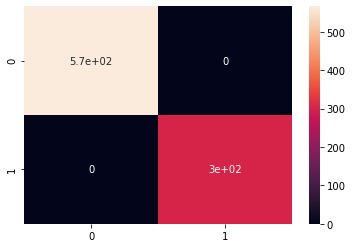

In [528]:
cm = confusion_matrix(Y_test,y_pred)
sb.heatmap(cm,annot=True)

<h2>------------------------------------------END-------------------------------------------------------------</h2>